# part 1: prepare data

In [185]:
import json
import string
import numpy as np
from sklearn.ensemble import  RandomForestClassifier
from sklearn.cluster import k_means
from sklearn.manifold import TSNE
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [139]:
def clean_split_text(text, stop_word_removal = False, ls = None):

    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    words = text.split()

    if stop_word_removal:
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]
    if ls == "lemmatization":
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(w) for w in words]
    elif ls == "stemming":
        stemmer = PorterStemmer()
        words = [stemmer.stem(w) for w in words]
    return words

In [140]:
train_Y = []
dictionary = {}
word_index = 0

with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\train.json") as jfile:
    train_data = json.load(jfile)
    
train_data = train_data[: 12000]

for i,t in enumerate(train_data):
    body = t["body"]
    title = t["title"]
    cat = t["category"]
    body = clean_split_text(body)
    title = clean_split_text(title)

    t["body"] = body
    t["title"] = title

    for word in body + title:
        if word in dictionary.keys():
            if i in dictionary[word].keys():
                dictionary[word][i] += 1
            else:
                dictionary[word][i] = 1

        else:
            dictionary[word] = {i:1}
            dictionary[word]["index"] = word_index
            word_index += 1

    train_Y.append(cat)
  

N = len(train_data)


In [141]:
def create_doc_vector_train(doc, doc_index, vec, di):
    for word in doc:
        if word in di.keys():
            tf = di[word][doc_index]
            idf = np.log(N / len(di[word].keys()))
            vec[di[word]["index"]] = tf * idf

In [142]:
train_X_pure = np.zeros((N, len(dictionary)))

for i, t in enumerate(train_data):
    create_doc_vector_train(t["body"] + t["title"], i, train_X_pure[i], dictionary)
 

In [143]:
def create_doc_vector(doc,  vec, dictionary):
    for word in doc:
        if word in dictionary.keys():
            tf = doc.count(word)
            idf = np.log(N / len(dictionary[word].keys()))
            vec[dictionary[word]["index"]] = tf * idf

In [144]:
N_val = 1500

with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\validation.json") as jfile:
    val_data = json.load(jfile)

val_data = val_data[ :N_val]
val_Y = []
val_X = np.zeros((N_val, len(dictionary)))

In [145]:
for i, t in enumerate(val_data):
    body = clean_split_text(t["body"])
    title = clean_split_text(t["title"])
    cat = t["category"]
    create_doc_vector(body + title, val_X[i], dictionary)
    val_Y.append(cat)


# part 2: KNN

In [36]:
class KNN:
    def __init__(self, k):
        self.train_X, self.train_Y = None, None
        self.k = k
    def fit(self, train_X, train_Y):
        self.train_X = train_X
        self.train_Y = train_Y
    def predict(self, X, method="euclidian"):
        if method == "euclidian":
            train = np.repeat([np.power(np.linalg.norm(self.train_X, axis=1), 2)], X.shape[0], axis=0)
            val = np.repeat([np.power(np.linalg.norm(X, axis=1), 2)], N, axis=0).T
            tv = 2 * np.matmul(X, self.train_X.T)
            dists = (train + val - tv)

            preds = []
            for i,d in enumerate(dists):
                d = np.stack([d, self.train_Y], axis=1)
                d = np.array(sorted(d, key=lambda row: row[0]))
                labels, scores = np.unique(d[:self.k, 1],return_counts=True)
                preds.append(labels[np.argmax(scores)])
                print(i, labels[np.argmax(scores)])
            return preds
        if method == "cosine":
            train = (self.train_X.T / np.linalg.norm(self.train_X, axis=1)).T
            val = X.T / np.linalg.norm(X, axis=1)
            dists = np.matmul(train, val)
            preds = []
            for i, d in enumerate(dists.T):
                d = np.stack([d, self.train_Y], axis=1)
                d = np.array(sorted(d, key=lambda row: row[0]))
                labels, scores = np.unique(d[-self.k:, 1], return_counts=True)
                preds.append(labels[np.argmax(scores)])
                print(i, labels[np.argmax(scores)])

            return preds

In [37]:
model = KNN(1)
model.fit(train_X_pure, train_Y)

In [38]:

preds_cosine = model.predict(val_X, method="cosine")
preds_euc = model.predict(val_X)

0 4.0
1 1.0
2 4.0
3 3.0
4 1.0
5 4.0
6 2.0
7 3.0
8 1.0
9 4.0
10 2.0
11 2.0
12 1.0
13 4.0
14 1.0
15 1.0
16 2.0
17 1.0
18 3.0
19 2.0
20 4.0
21 4.0
22 2.0
23 1.0
24 1.0
25 1.0
26 4.0
27 1.0
28 1.0
29 3.0
30 3.0
31 3.0
32 1.0
33 4.0
34 2.0
35 2.0
36 1.0
37 4.0
38 3.0
39 1.0
40 1.0
41 1.0
42 3.0
43 1.0
44 1.0
45 4.0
46 3.0
47 4.0
48 2.0
49 2.0
50 3.0
51 3.0
52 1.0
53 2.0
54 4.0
55 2.0
56 1.0
57 3.0
58 1.0
59 2.0
60 1.0
61 4.0
62 1.0
63 1.0
64 2.0
65 4.0
66 2.0
67 2.0
68 3.0
69 1.0
70 1.0
71 2.0
72 2.0
73 2.0
74 3.0
75 3.0
76 1.0
77 4.0
78 3.0
79 2.0
80 2.0
81 1.0
82 2.0
83 4.0
84 1.0
85 4.0
86 2.0
87 2.0
88 1.0
89 3.0
90 2.0
91 4.0
92 2.0
93 1.0
94 2.0
95 3.0
96 3.0
97 2.0
98 3.0
99 1.0
100 2.0
101 2.0
102 2.0
103 1.0
104 3.0
105 4.0
106 2.0
107 1.0
108 4.0
109 2.0
110 2.0
111 2.0
112 3.0
113 3.0
114 4.0
115 3.0
116 3.0
117 4.0
118 1.0
119 4.0
120 2.0
121 1.0
122 4.0
123 1.0
124 1.0
125 3.0
126 3.0
127 1.0
128 1.0
129 3.0
130 3.0
131 4.0
132 4.0
133 3.0
134 3.0
135 4.0
136 2.0
137 1.0
138 1.

1039 4.0
1040 2.0
1041 2.0
1042 1.0
1043 1.0
1044 3.0
1045 4.0
1046 1.0
1047 1.0
1048 4.0
1049 4.0
1050 4.0
1051 3.0
1052 4.0
1053 3.0
1054 4.0
1055 2.0
1056 4.0
1057 1.0
1058 4.0
1059 1.0
1060 3.0
1061 4.0
1062 2.0
1063 3.0
1064 2.0
1065 2.0
1066 2.0
1067 2.0
1068 1.0
1069 1.0
1070 3.0
1071 4.0
1072 4.0
1073 1.0
1074 3.0
1075 3.0
1076 4.0
1077 2.0
1078 1.0
1079 3.0
1080 4.0
1081 1.0
1082 3.0
1083 1.0
1084 3.0
1085 3.0
1086 4.0
1087 4.0
1088 3.0
1089 2.0
1090 2.0
1091 3.0
1092 2.0
1093 4.0
1094 2.0
1095 2.0
1096 4.0
1097 4.0
1098 4.0
1099 3.0
1100 1.0
1101 2.0
1102 3.0
1103 2.0
1104 2.0
1105 4.0
1106 3.0
1107 2.0
1108 2.0
1109 2.0
1110 1.0
1111 4.0
1112 1.0
1113 2.0
1114 3.0
1115 4.0
1116 3.0
1117 2.0
1118 3.0
1119 3.0
1120 4.0
1121 2.0
1122 4.0
1123 1.0
1124 2.0
1125 3.0
1126 3.0
1127 4.0
1128 3.0
1129 1.0
1130 1.0
1131 2.0
1132 3.0
1133 2.0
1134 1.0
1135 4.0
1136 3.0
1137 1.0
1138 1.0
1139 1.0
1140 3.0
1141 3.0
1142 4.0
1143 3.0
1144 1.0
1145 1.0
1146 4.0
1147 3.0
1148 2.0
1149 2.0
1

530 3.0
531 1.0
532 3.0
533 1.0
534 3.0
535 3.0
536 3.0
537 3.0
538 1.0
539 3.0
540 3.0
541 3.0
542 3.0
543 3.0
544 3.0
545 3.0
546 3.0
547 3.0
548 3.0
549 3.0
550 1.0
551 3.0
552 3.0
553 3.0
554 3.0
555 4.0
556 3.0
557 2.0
558 4.0
559 3.0
560 3.0
561 3.0
562 3.0
563 3.0
564 4.0
565 2.0
566 1.0
567 1.0
568 3.0
569 3.0
570 4.0
571 3.0
572 3.0
573 4.0
574 3.0
575 3.0
576 3.0
577 3.0
578 2.0
579 3.0
580 3.0
581 3.0
582 1.0
583 3.0
584 4.0
585 4.0
586 4.0
587 3.0
588 3.0
589 3.0
590 4.0
591 2.0
592 3.0
593 3.0
594 1.0
595 3.0
596 4.0
597 3.0
598 3.0
599 2.0
600 3.0
601 3.0
602 3.0
603 3.0
604 1.0
605 3.0
606 3.0
607 3.0
608 3.0
609 3.0
610 3.0
611 3.0
612 3.0
613 3.0
614 1.0
615 3.0
616 3.0
617 3.0
618 3.0
619 3.0
620 3.0
621 3.0
622 3.0
623 3.0
624 3.0
625 3.0
626 3.0
627 3.0
628 3.0
629 4.0
630 3.0
631 3.0
632 4.0
633 3.0
634 3.0
635 1.0
636 3.0
637 1.0
638 2.0
639 3.0
640 3.0
641 3.0
642 3.0
643 3.0
644 4.0
645 3.0
646 1.0
647 1.0
648 3.0
649 3.0
650 3.0
651 3.0
652 3.0
653 3.0
654 1.0


In [39]:
model = KNN(3)
model.fit(train_X_pure, train_Y)

In [40]:

preds_cosine_three = model.predict(val_X, method="cosine")
preds_euc_three = model.predict(val_X)

0 4.0
1 1.0
2 4.0
3 3.0
4 4.0
5 4.0
6 2.0
7 3.0
8 1.0
9 4.0
10 2.0
11 2.0
12 3.0
13 4.0
14 2.0
15 1.0
16 2.0
17 1.0
18 3.0
19 2.0
20 4.0
21 4.0
22 2.0
23 1.0
24 1.0
25 1.0
26 4.0
27 1.0
28 1.0
29 3.0
30 3.0
31 3.0
32 1.0
33 4.0
34 2.0
35 2.0
36 1.0
37 4.0
38 3.0
39 1.0
40 1.0
41 1.0
42 3.0
43 1.0
44 1.0
45 4.0
46 4.0
47 4.0
48 2.0
49 2.0
50 3.0
51 3.0
52 1.0
53 2.0
54 4.0
55 2.0
56 1.0
57 3.0
58 1.0
59 2.0
60 1.0
61 4.0
62 1.0
63 1.0
64 2.0
65 4.0
66 2.0
67 2.0
68 3.0
69 1.0
70 1.0
71 2.0
72 2.0
73 2.0
74 3.0
75 3.0
76 1.0
77 1.0
78 3.0
79 2.0
80 2.0
81 1.0
82 2.0
83 1.0
84 1.0
85 3.0
86 2.0
87 2.0
88 3.0
89 1.0
90 2.0
91 4.0
92 2.0
93 1.0
94 2.0
95 4.0
96 3.0
97 2.0
98 3.0
99 1.0
100 2.0
101 2.0
102 2.0
103 1.0
104 3.0
105 4.0
106 2.0
107 1.0
108 4.0
109 2.0
110 2.0
111 2.0
112 4.0
113 3.0
114 4.0
115 3.0
116 3.0
117 4.0
118 1.0
119 4.0
120 2.0
121 4.0
122 4.0
123 1.0
124 1.0
125 1.0
126 3.0
127 4.0
128 1.0
129 3.0
130 3.0
131 4.0
132 4.0
133 3.0
134 3.0
135 4.0
136 1.0
137 1.0
138 1.

1041 2.0
1042 1.0
1043 1.0
1044 3.0
1045 4.0
1046 3.0
1047 1.0
1048 4.0
1049 1.0
1050 4.0
1051 3.0
1052 1.0
1053 3.0
1054 4.0
1055 2.0
1056 4.0
1057 1.0
1058 4.0
1059 3.0
1060 3.0
1061 4.0
1062 2.0
1063 3.0
1064 2.0
1065 2.0
1066 1.0
1067 2.0
1068 1.0
1069 1.0
1070 3.0
1071 4.0
1072 4.0
1073 1.0
1074 3.0
1075 3.0
1076 4.0
1077 2.0
1078 1.0
1079 1.0
1080 4.0
1081 1.0
1082 3.0
1083 1.0
1084 3.0
1085 3.0
1086 4.0
1087 4.0
1088 1.0
1089 2.0
1090 2.0
1091 3.0
1092 2.0
1093 4.0
1094 2.0
1095 2.0
1096 4.0
1097 4.0
1098 4.0
1099 3.0
1100 1.0
1101 2.0
1102 3.0
1103 2.0
1104 2.0
1105 4.0
1106 3.0
1107 2.0
1108 2.0
1109 2.0
1110 2.0
1111 4.0
1112 1.0
1113 2.0
1114 3.0
1115 4.0
1116 3.0
1117 2.0
1118 3.0
1119 3.0
1120 4.0
1121 2.0
1122 1.0
1123 1.0
1124 2.0
1125 1.0
1126 3.0
1127 4.0
1128 3.0
1129 1.0
1130 1.0
1131 2.0
1132 1.0
1133 2.0
1134 3.0
1135 4.0
1136 3.0
1137 1.0
1138 1.0
1139 1.0
1140 3.0
1141 3.0
1142 4.0
1143 3.0
1144 1.0
1145 1.0
1146 4.0
1147 3.0
1148 2.0
1149 2.0
1150 2.0
1151 3.0
1

530 1.0
531 1.0
532 3.0
533 1.0
534 1.0
535 2.0
536 3.0
537 1.0
538 1.0
539 1.0
540 1.0
541 1.0
542 1.0
543 3.0
544 1.0
545 1.0
546 2.0
547 1.0
548 1.0
549 2.0
550 1.0
551 3.0
552 1.0
553 1.0
554 3.0
555 4.0
556 3.0
557 2.0
558 4.0
559 1.0
560 2.0
561 4.0
562 1.0
563 4.0
564 4.0
565 2.0
566 1.0
567 1.0
568 3.0
569 4.0
570 4.0
571 1.0
572 4.0
573 4.0
574 3.0
575 1.0
576 1.0
577 1.0
578 2.0
579 3.0
580 3.0
581 1.0
582 1.0
583 2.0
584 4.0
585 4.0
586 4.0
587 2.0
588 4.0
589 2.0
590 4.0
591 2.0
592 1.0
593 1.0
594 1.0
595 1.0
596 4.0
597 3.0
598 1.0
599 2.0
600 2.0
601 4.0
602 4.0
603 1.0
604 1.0
605 2.0
606 1.0
607 3.0
608 1.0
609 3.0
610 1.0
611 1.0
612 1.0
613 2.0
614 1.0
615 4.0
616 3.0
617 3.0
618 3.0
619 3.0
620 3.0
621 1.0
622 3.0
623 1.0
624 3.0
625 1.0
626 1.0
627 2.0
628 4.0
629 4.0
630 1.0
631 3.0
632 4.0
633 1.0
634 1.0
635 1.0
636 1.0
637 1.0
638 2.0
639 1.0
640 3.0
641 1.0
642 1.0
643 3.0
644 4.0
645 1.0
646 1.0
647 1.0
648 2.0
649 3.0
650 1.0
651 4.0
652 4.0
653 3.0
654 1.0


1494 4.0
1495 1.0
1496 1.0
1497 3.0
1498 3.0
1499 4.0


In [41]:
model = KNN(5)
model.fit(train_X_pure, train_Y)

In [42]:
preds_cosine_five = model.predict(val_X, method="cosine")
preds_euc_five = model.predict(val_X)

0 4.0
1 1.0
2 4.0
3 3.0
4 4.0
5 4.0
6 2.0
7 3.0
8 1.0
9 4.0
10 2.0
11 2.0
12 3.0
13 4.0
14 2.0
15 1.0
16 2.0
17 1.0
18 3.0
19 2.0
20 4.0
21 4.0
22 1.0
23 1.0
24 1.0
25 1.0
26 4.0
27 1.0
28 1.0
29 3.0
30 3.0
31 3.0
32 1.0
33 4.0
34 2.0
35 2.0
36 1.0
37 4.0
38 3.0
39 3.0
40 1.0
41 1.0
42 4.0
43 1.0
44 1.0
45 4.0
46 4.0
47 4.0
48 2.0
49 2.0
50 3.0
51 3.0
52 1.0
53 2.0
54 4.0
55 2.0
56 1.0
57 3.0
58 1.0
59 2.0
60 1.0
61 3.0
62 1.0
63 1.0
64 2.0
65 4.0
66 2.0
67 2.0
68 3.0
69 1.0
70 1.0
71 2.0
72 2.0
73 2.0
74 3.0
75 3.0
76 1.0
77 1.0
78 3.0
79 2.0
80 2.0
81 2.0
82 2.0
83 4.0
84 1.0
85 3.0
86 2.0
87 2.0
88 3.0
89 3.0
90 2.0
91 1.0
92 2.0
93 1.0
94 2.0
95 4.0
96 3.0
97 2.0
98 3.0
99 1.0
100 2.0
101 2.0
102 2.0
103 1.0
104 3.0
105 3.0
106 2.0
107 1.0
108 4.0
109 2.0
110 2.0
111 2.0
112 4.0
113 4.0
114 4.0
115 3.0
116 3.0
117 4.0
118 1.0
119 4.0
120 2.0
121 4.0
122 4.0
123 1.0
124 1.0
125 1.0
126 3.0
127 4.0
128 1.0
129 3.0
130 3.0
131 4.0
132 4.0
133 3.0
134 3.0
135 4.0
136 1.0
137 1.0
138 1.

1041 2.0
1042 1.0
1043 1.0
1044 3.0
1045 4.0
1046 3.0
1047 1.0
1048 4.0
1049 1.0
1050 4.0
1051 3.0
1052 1.0
1053 3.0
1054 4.0
1055 2.0
1056 4.0
1057 1.0
1058 4.0
1059 3.0
1060 3.0
1061 4.0
1062 2.0
1063 3.0
1064 2.0
1065 2.0
1066 1.0
1067 2.0
1068 1.0
1069 1.0
1070 3.0
1071 4.0
1072 4.0
1073 1.0
1074 1.0
1075 3.0
1076 4.0
1077 2.0
1078 1.0
1079 3.0
1080 4.0
1081 1.0
1082 3.0
1083 1.0
1084 3.0
1085 3.0
1086 4.0
1087 4.0
1088 3.0
1089 1.0
1090 2.0
1091 3.0
1092 2.0
1093 4.0
1094 2.0
1095 2.0
1096 4.0
1097 4.0
1098 4.0
1099 3.0
1100 3.0
1101 2.0
1102 3.0
1103 2.0
1104 2.0
1105 4.0
1106 3.0
1107 2.0
1108 2.0
1109 2.0
1110 1.0
1111 4.0
1112 1.0
1113 2.0
1114 3.0
1115 4.0
1116 3.0
1117 2.0
1118 3.0
1119 3.0
1120 4.0
1121 2.0
1122 1.0
1123 1.0
1124 2.0
1125 1.0
1126 3.0
1127 4.0
1128 3.0
1129 1.0
1130 1.0
1131 2.0
1132 1.0
1133 2.0
1134 3.0
1135 4.0
1136 3.0
1137 1.0
1138 1.0
1139 1.0
1140 3.0
1141 3.0
1142 4.0
1143 3.0
1144 1.0
1145 2.0
1146 4.0
1147 3.0
1148 2.0
1149 2.0
1150 2.0
1151 3.0
1

523 4.0
524 3.0
525 3.0
526 4.0
527 3.0
528 2.0
529 1.0
530 3.0
531 1.0
532 3.0
533 4.0
534 4.0
535 4.0
536 3.0
537 1.0
538 1.0
539 1.0
540 4.0
541 1.0
542 4.0
543 3.0
544 4.0
545 3.0
546 4.0
547 4.0
548 1.0
549 2.0
550 1.0
551 3.0
552 4.0
553 3.0
554 1.0
555 4.0
556 3.0
557 2.0
558 4.0
559 4.0
560 3.0
561 1.0
562 4.0
563 1.0
564 4.0
565 2.0
566 1.0
567 1.0
568 3.0
569 4.0
570 4.0
571 1.0
572 1.0
573 4.0
574 3.0
575 1.0
576 1.0
577 1.0
578 2.0
579 3.0
580 3.0
581 1.0
582 1.0
583 4.0
584 4.0
585 3.0
586 4.0
587 4.0
588 4.0
589 4.0
590 4.0
591 2.0
592 4.0
593 4.0
594 1.0
595 1.0
596 3.0
597 3.0
598 4.0
599 2.0
600 1.0
601 1.0
602 4.0
603 4.0
604 1.0
605 4.0
606 3.0
607 3.0
608 1.0
609 3.0
610 2.0
611 3.0
612 4.0
613 2.0
614 1.0
615 4.0
616 3.0
617 3.0
618 3.0
619 3.0
620 3.0
621 1.0
622 3.0
623 4.0
624 3.0
625 4.0
626 4.0
627 2.0
628 4.0
629 4.0
630 4.0
631 3.0
632 4.0
633 1.0
634 4.0
635 1.0
636 4.0
637 1.0
638 2.0
639 4.0
640 3.0
641 4.0
642 3.0
643 1.0
644 3.0
645 1.0
646 1.0
647 1.0


1497 3.0
1498 3.0
1499 4.0


# Knn with stop words removed

In [13]:
dictionary_sw = {}
word_index = 0
train_Y = []

with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\train.json") as jfile:
    train_data = json.load(jfile)
    
train_data = train_data[: 12000]

for i,t in enumerate(train_data):
    body = t["body"]
    title = t["title"]
    cat = t["category"]
    body = clean_split_text(body, stop_word_removal = True)
    title = clean_split_text(title,  stop_word_removal = True)
    train_Y.append(cat)

    t["body"] = body
    t["title"] = title

    for word in body + title:
        if word in dictionary_sw.keys():
            if i in dictionary_sw[word].keys():
                dictionary_sw[word][i] += 1
            else:
                dictionary_sw[word][i] = 1

        else:
            dictionary_sw[word] = {i:1}
            dictionary_sw[word]["index"] = word_index
            word_index += 1


  

In [14]:
train_X_sw = np.zeros((N, len(dictionary_sw)))

for i, t in enumerate(train_data):
    create_doc_vector_train(t["body"] + t["title"], i, train_X_sw[i], dictionary_sw)

In [16]:
N_val = 1500

with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\validation.json") as jfile:
    val_data = json.load(jfile)

val_data = val_data[ :N_val]

val_X_sw = np.zeros((N_val, len(dictionary_sw)))

In [17]:
val_Y = []
for i, t in enumerate(val_data):
    body = clean_split_text(t["body"],  stop_word_removal = True)
    title = clean_split_text(t["title"],  stop_word_removal = True)
    cat = t["category"]
    create_doc_vector(body + title, val_X_sw[i], dictionary_sw)
    val_Y.append(cat)


In [24]:
model_sw = KNN(5)
model_sw.fit(train_X_sw, train_Y)

In [25]:
preds_sw = model_sw.predict(val_X_sw, method = "cosine")

0 4.0
1 1.0
2 4.0
3 3.0
4 4.0
5 4.0
6 2.0
7 3.0
8 1.0
9 4.0
10 2.0
11 2.0
12 3.0
13 4.0
14 2.0
15 1.0
16 2.0
17 1.0
18 3.0
19 2.0
20 4.0
21 4.0
22 1.0
23 1.0
24 1.0
25 1.0
26 4.0
27 1.0
28 1.0
29 3.0
30 3.0
31 3.0
32 1.0
33 4.0
34 2.0
35 2.0
36 1.0
37 4.0
38 3.0
39 3.0
40 1.0
41 1.0
42 4.0
43 1.0
44 1.0
45 4.0
46 4.0
47 4.0
48 2.0
49 2.0
50 3.0
51 3.0
52 1.0
53 2.0
54 3.0
55 2.0
56 1.0
57 3.0
58 1.0
59 2.0
60 1.0
61 3.0
62 1.0
63 1.0
64 2.0
65 4.0
66 2.0
67 2.0
68 3.0
69 1.0
70 1.0
71 2.0
72 2.0
73 2.0
74 3.0
75 3.0
76 1.0
77 1.0
78 3.0
79 2.0
80 2.0
81 2.0
82 2.0
83 4.0
84 1.0
85 3.0
86 2.0
87 2.0
88 3.0
89 3.0
90 2.0
91 1.0
92 2.0
93 1.0
94 2.0
95 4.0
96 3.0
97 2.0
98 3.0
99 1.0
100 2.0
101 2.0
102 2.0
103 1.0
104 3.0
105 3.0
106 2.0
107 1.0
108 4.0
109 2.0
110 2.0
111 2.0
112 4.0
113 4.0
114 4.0
115 3.0
116 3.0
117 4.0
118 1.0
119 4.0
120 2.0
121 4.0
122 4.0
123 1.0
124 1.0
125 3.0
126 3.0
127 4.0
128 1.0
129 3.0
130 3.0
131 4.0
132 4.0
133 3.0
134 3.0
135 4.0
136 1.0
137 1.0
138 1.

1040 2.0
1041 2.0
1042 1.0
1043 1.0
1044 3.0
1045 4.0
1046 3.0
1047 1.0
1048 4.0
1049 1.0
1050 4.0
1051 3.0
1052 1.0
1053 3.0
1054 4.0
1055 2.0
1056 2.0
1057 1.0
1058 4.0
1059 3.0
1060 3.0
1061 4.0
1062 2.0
1063 3.0
1064 2.0
1065 2.0
1066 1.0
1067 2.0
1068 1.0
1069 1.0
1070 3.0
1071 4.0
1072 4.0
1073 1.0
1074 3.0
1075 3.0
1076 4.0
1077 2.0
1078 1.0
1079 3.0
1080 4.0
1081 1.0
1082 3.0
1083 1.0
1084 3.0
1085 3.0
1086 4.0
1087 4.0
1088 3.0
1089 1.0
1090 2.0
1091 3.0
1092 2.0
1093 4.0
1094 2.0
1095 2.0
1096 4.0
1097 4.0
1098 4.0
1099 3.0
1100 3.0
1101 2.0
1102 3.0
1103 2.0
1104 2.0
1105 4.0
1106 3.0
1107 2.0
1108 2.0
1109 2.0
1110 2.0
1111 4.0
1112 1.0
1113 2.0
1114 3.0
1115 4.0
1116 3.0
1117 2.0
1118 3.0
1119 1.0
1120 4.0
1121 2.0
1122 1.0
1123 1.0
1124 2.0
1125 1.0
1126 3.0
1127 4.0
1128 3.0
1129 1.0
1130 1.0
1131 2.0
1132 1.0
1133 2.0
1134 3.0
1135 4.0
1136 3.0
1137 1.0
1138 1.0
1139 1.0
1140 3.0
1141 3.0
1142 4.0
1143 3.0
1144 1.0
1145 1.0
1146 4.0
1147 3.0
1148 2.0
1149 2.0
1150 2.0
1

# model reports

In [221]:
def conf_mat(labels, preds):
    labels = np.array(labels)
    preds = np.array(preds)
    true_arg = np.where(labels == preds)
    false_arg = np.where(preds != labels)
    false_arg = np.where(preds != labels)
    tp = np.zeros((4,))
    fp = np.zeros((4,))
    tn = np.zeros((4,))
    fn = np.zeros((4,))
    for i in range(1,5):
        class_true = labels[true_arg]

        class_true = len(class_true[class_true==i])
        tp[i - 1] = class_true

    for i in range(1, 5):
        class_false = labels[false_arg]
        class_false = len(class_false[class_false == i])
        fp[i - 1] = class_false
    for i in range(1, 5):
        class_false = labels[false_arg]
        class_false = len(class_false[class_false == i])
        fp[i - 1] = class_false
    for i in range(1, 5):
        class_tn = np.argwhere(labels != i)
        class_tn = preds[class_tn]
        class_tn = len(class_tn[class_tn != i])
        tn[i - 1] = class_tn
    for i in range(1, 5):
        class_fn = np.argwhere(labels != i)
        class_fn = preds[class_fn]
        class_fn = len(class_fn[class_fn == i])
        fn[i - 1] = class_fn
    return tp, tn, fp, fn

def accuracy(labels, preds):
    predictions = np.array(labels) == preds
    true = len(np.argwhere(predictions == True))
    return true / len(labels)


def precision(labels, preds):
    tp, tn, fp, fn = conf_mat(labels, preds)
    pr = 0
    pres = []
    for  i in range(4):
        p = tp[i] / (tp[i] + fp[i])
        pres.append(p)
    return pres

def recall(labels, preds):
    tp, tn, fp, fn = conf_mat(labels, preds)
    res = []
    for  i in range(4):
        res.append(tp[i] / (tp[i] + fn[i]))
    return res

def f1(recall, precision):
    f = 0
    for i in range(4):
        f += (recall[i] * precision[i] * 2) / (recall[i] + precision[i])
    return f / 4
   
def print_report(labels, preds):
    print("accuracy: ", accuracy(labels,preds))
    res = recall(labels,preds)
    pres = precision(labels, preds)
    print("precision: ", pres)
    print("recall: ", res)
    print("f1 score: ", f1(pres, res))
    print("confusion matrix:")
    print(conf_mat(labels, preds))

In [222]:
print("classification report for Knn with cosine distance and k = 1:")
print_report(preds_cosine, val_Y)

classification report for Knn with cosine distance and k = 1:
accuracy:  0.8213333333333334
precision:  [0.8174807197943444, 0.903485254691689, 0.7842105263157895, 0.7793296089385475]
recall:  [0.8302872062663186, 0.9010695187165776, 0.7862796833773087, 0.7664835164835165]
f1 score:  0.8210517234994724
confusion matrix:
(array([318., 337., 298., 279.]), array([1046., 1090., 1039., 1057.]), array([71., 36., 82., 79.]), array([65., 37., 81., 85.]))


In [223]:

print("classification report for Knn with euclidian distance and k = 1:")
print_report(preds_euc, val_Y)

classification report for Knn with euclidian distance and k = 1:
accuracy:  0.47333333333333333
precision:  [0.823170731707317, 0.9611650485436893, 0.3202247191011236, 0.8121212121212121]
recall:  [0.3524804177545692, 0.2647058823529412, 0.9023746701846965, 0.36813186813186816]
f1 score:  0.47200355039946273
confusion matrix:
(array([135.,  99., 342., 134.]), array([1088., 1122.,  395., 1105.]), array([ 29.,   4., 726.,  31.]), array([248., 275.,  37., 230.]))


In [224]:
print("classification report for Knn with cosine distance and k = 3:")
print_report(preds_cosine_three, val_Y)

classification report for Knn with cosine distance and k = 3:
accuracy:  0.844
precision:  [0.8106796116504854, 0.9037433155080213, 0.8507042253521127, 0.8133704735376045]
recall:  [0.8720626631853786, 0.9037433155080213, 0.7968337730870713, 0.8021978021978022]
f1 score:  0.8436571690136881
confusion matrix:
(array([334., 338., 302., 292.]), array([1039., 1090., 1068., 1069.]), array([78., 36., 53., 67.]), array([49., 36., 77., 72.]))


In [225]:
print("classification report for Knn with euclidian distance and k = 3:")
print_report(preds_euc_three, val_Y)

classification report for Knn with euclidian distance and k = 3:
accuracy:  0.608
precision:  [0.46438746438746437, 0.8723404255319149, 0.7421602787456446, 0.6470588235294118]
recall:  [0.8511749347258486, 0.4385026737967914, 0.5620052770448549, 0.5741758241758241]
f1 score:  0.6081584238758148
confusion matrix:
(array([326., 164., 213., 209.]), array([ 741., 1102., 1047., 1022.]), array([376.,  24.,  74., 114.]), array([ 57., 210., 166., 155.]))


In [226]:
print("classification report for Knn with cosine distance and k = 5:")
print_report(preds_cosine_five, val_Y)

classification report for Knn with cosine distance and k = 5:
accuracy:  0.8546666666666667
precision:  [0.845, 0.9138381201044387, 0.8315217391304348, 0.8252148997134671]
recall:  [0.8825065274151436, 0.9358288770053476, 0.8073878627968337, 0.7912087912087912]
f1 score:  0.8537950311787194
confusion matrix:
(array([338., 350., 306., 288.]), array([1055., 1093., 1059., 1075.]), array([62., 33., 62., 61.]), array([45., 24., 73., 76.]))


In [227]:
print("classification report for Knn with euclidian distance and k = 5:")
print_report(preds_euc_five, val_Y)

classification report for Knn with euclidian distance and k = 5:
accuracy:  0.606
precision:  [0.6878172588832487, 0.948905109489051, 0.6602209944751382, 0.443163097199341]
recall:  [0.7075718015665796, 0.34759358288770054, 0.6306068601583114, 0.739010989010989]
f1 score:  0.6013757887427397
confusion matrix:
(array([271., 130., 239., 269.]), array([ 994., 1119.,  998.,  798.]), array([123.,   7., 123., 338.]), array([112., 244., 140.,  95.]))


As you can see the best k for cosine similarity is 5 and for euclidian distance it is 3

In [228]:
print("classification report for Knn with cosine distance and stop words removed:")
print_report(preds_sw, val_Y)

classification report for Knn with cosine distance and stop words removed:
accuracy:  0.8533333333333334
precision:  [0.851010101010101, 0.9095607235142119, 0.8213333333333334, 0.827485380116959]
recall:  [0.8798955613577023, 0.9411764705882353, 0.8126649076517151, 0.7774725274725275]
f1 score:  0.8522465521452953
confusion matrix:
(array([337., 352., 308., 283.]), array([1058., 1091., 1054., 1077.]), array([59., 35., 67., 59.]), array([46., 22., 71., 81.]))


As you can observe above, sop word removal does not affect the classification quality much

# Naive bayes

In [229]:
class Naive_bayes:
    def __init__(self, alpha, num_classes):
        self.alpha = alpha
        self.num_classes = num_classes
        self.dictionary, self.class_freq = {}, None
    def fit(self, dictionary, word_class, class_freq):
        V = len(dictionary)
        self.class_freq = np.array(list(class_freq.values()))
        self.class_freq =  self.class_freq / np.sum(self.class_freq)
        for word in dictionary:
            self.dictionary[word] = {}
            for i in range(1,self.num_classes + 1):
                self.dictionary[word][i] = (dictionary[word][i] + self.alpha) / (word_class[1] + (V * self.alpha))

    def predict(self, X):
        c = np.copy(np.log(self.class_freq))
        for word in X:
            if word in self.dictionary.keys():
                cond_probs = np.log(list(self.dictionary[word].values()))
                c += cond_probs

        return np.argmax(c) + 1

In [230]:
dictionary = {}
N = len(train_data)

train_Y = []
class_freq = {1:0, 2:0, 3:0, 4:0}
word_class_freq = {1:0, 2:0, 3:0, 4:0}

with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\train.json") as jfile:
    train_data = json.load(jfile)

for i,t in enumerate(train_data):
    body = t["body"]
    title = t["title"]
    cat = t["category"]
    body = clean_split_text(body)
    title = clean_split_text(title)

    t["body"] = body
    t["title"] = title

    class_freq[cat] += 1

    for word in body + title:
        word_class_freq[cat] += 1
        if word in dictionary.keys():
            dictionary[word][cat] += 1
        else:
            dictionary[word] = {1:0, 2:0, 3:0, 4:0}
            dictionary[word][cat] += 1


    train_Y.append(cat)

In [231]:
with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\validation.json") as jfile:
    val_data = json.load(jfile)

acc = 0


model = Naive_bayes(0.5, 4)
model.fit(dictionary, word_class_freq, class_freq)
for alpha in np.arange(0.1,1.01, 0.1):
    model.alpha = alpha
    val_Y = []
    preds = []
    model.fit(dictionary, word_class_freq, class_freq)
    for t in val_data:
        body = t["body"]
        title = t["title"]
        cat = t["category"]
        body = clean_split_text(body)
        title = clean_split_text(title)
        pred = model.predict(body + title)
        preds.append(pred)
        val_Y.append(cat)
    print (alpha, accuracy(preds, val_Y))

0.1 0.893
0.2 0.894
0.30000000000000004 0.895
0.4 0.896
0.5 0.896
0.6 0.896
0.7000000000000001 0.8963333333333333
0.8 0.8963333333333333
0.9 0.8956666666666667
1.0 0.895


As you can see, the best alpha is equal to 0.8

In [232]:
model.alpha = 0.8
model.fit(dictionary, word_class_freq, class_freq)
preds = []
for t in val_data:
    body = t["body"]
    title = t["title"]
    cat = t["category"]
    body = clean_split_text(body)
    title = clean_split_text(title)
    pred = model.predict(body + title)
    preds.append(pred)
print_report(preds, val_Y)

accuracy:  0.8963333333333333
precision:  [0.8994638069705094, 0.9408740359897172, 0.8751714677640604, 0.8674698795180723]
recall:  [0.8946666666666667, 0.976, 0.8506666666666667, 0.864]
f1 score:  0.8959126419351382
confusion matrix:
(array([671., 732., 638., 648.]), array([2175., 2204., 2159., 2151.]), array([75., 46., 91., 99.]), array([ 79.,  18., 112., 102.]))


# Naive bayes: stop word removal

In [233]:
dictionary = {}
N = len(train_data)

train_Y = []
class_freq = {1:0, 2:0, 3:0, 4:0}
word_class_freq = {1:0, 2:0, 3:0, 4:0}

with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\train.json") as jfile:
    train_data = json.load(jfile)

for i,t in enumerate(train_data):
    body = t["body"]
    title = t["title"]
    cat = t["category"]
    body = clean_split_text(body, stop_word_removal = True)
    title = clean_split_text(title, stop_word_removal = True)

    t["body"] = body
    t["title"] = title

    class_freq[cat] += 1

    for word in body + title:
        word_class_freq[cat] += 1
        if word in dictionary.keys():
            dictionary[word][cat] += 1
        else:
            dictionary[word] = {1:0, 2:0, 3:0, 4:0}
            dictionary[word][cat] += 1


    train_Y.append(cat)

In [234]:
with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\validation.json") as jfile:
    val_data = json.load(jfile)


acc = 0


model = Naive_bayes(0.5, 4)
model.fit(dictionary, word_class_freq, class_freq)

for alpha in np.arange(0.1,1.01, 0.1):
    val_Y = []
    preds = []
    model.alpha = alpha
    model.fit(dictionary, word_class_freq, class_freq)
    for t in val_data:
        body = t["body"]
        title = t["title"]
        cat = t["category"]
        body = clean_split_text(body, stop_word_removal = True)
        title = clean_split_text(title, stop_word_removal = True)
        pred = model.predict(body + title)
        preds.append(pred)
        val_Y.append(cat)
    print (alpha, accuracy(preds, val_Y))

0.1 0.897
0.2 0.8993333333333333
0.30000000000000004 0.8976666666666666
0.4 0.897
0.5 0.898
0.6 0.898
0.7000000000000001 0.8973333333333333
0.8 0.897
0.9 0.8963333333333333
1.0 0.8963333333333333


The best alpha for this setting is 0.2

In [235]:
model.alpha = 0.2
model.fit(dictionary, word_class_freq, class_freq)
preds = []
for t in val_data:
    body = t["body"]
    title = t["title"]
    cat = t["category"]
    body = clean_split_text(body, stop_word_removal = True)
    title = clean_split_text(title, stop_word_removal = True)
    pred = model.predict(body + title)
    preds.append(pred)
print_report(preds, val_Y)

accuracy:  0.8993333333333333
precision:  [0.9069767441860465, 0.9505851755526658, 0.8699731903485255, 0.8687002652519894]
recall:  [0.884, 0.9746666666666667, 0.8653333333333333, 0.8733333333333333]
f1 score:  0.8991184989118801
confusion matrix:
(array([663., 731., 649., 655.]), array([2182., 2212., 2153., 2151.]), array([68., 38., 97., 99.]), array([ 87.,  19., 101.,  95.]))


# Naive bayes: Lemmatization

In [236]:
dictionary = {}
N = len(train_data)

train_Y = []
class_freq = {1:0, 2:0, 3:0, 4:0}
word_class_freq = {1:0, 2:0, 3:0, 4:0}

with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\train.json") as jfile:
    train_data = json.load(jfile)

for i,t in enumerate(train_data):
    body = t["body"]
    title = t["title"]
    cat = t["category"]
    body = clean_split_text(body, ls = "lemmatization")
    title = clean_split_text(title, ls = "lemmatization")

    t["body"] = body
    t["title"] = title

    class_freq[cat] += 1

    for word in body + title:
        word_class_freq[cat] += 1
        if word in dictionary.keys():
            dictionary[word][cat] += 1
        else:
            dictionary[word] = {1:0, 2:0, 3:0, 4:0}
            dictionary[word][cat] += 1


    train_Y.append(cat)

In [237]:
with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\validation.json") as jfile:
    val_data = json.load(jfile)


acc = 0


model = Naive_bayes(0.5, 4)
model.fit(dictionary, word_class_freq, class_freq)
for alpha in np.arange(0.1,1.01, 0.1):
    val_Y = []
    preds = []
    model.alpha = alpha
    model.fit(dictionary, word_class_freq, class_freq)
    for t in val_data:
        body = t["body"]
        title = t["title"]
        cat = t["category"]
        body = clean_split_text(body, ls = "lemmatization")
        title = clean_split_text(title, ls = "lemmatization")
        pred = model.predict(body + title)
        preds.append(pred)
        val_Y.append(cat)
    print (alpha, accuracy(preds, val_Y))

0.1 0.8953333333333333
0.2 0.8956666666666667
0.30000000000000004 0.8976666666666666
0.4 0.897
0.5 0.8966666666666666
0.6 0.897
0.7000000000000001 0.897
0.8 0.8963333333333333
0.9 0.896
1.0 0.8956666666666667


The best alpha for this setting is 0.6

In [238]:
model.alpha = 0.6
model.fit(dictionary, word_class_freq, class_freq)
preds = []
for t in val_data:
    body = t["body"]
    title = t["title"]
    cat = t["category"]
    body = clean_split_text(body, ls = "lemmatization")
    title = clean_split_text(title, ls = "lemmatization")
    pred = model.predict(body + title)
    preds.append(pred)
print_report(preds, val_Y)

accuracy:  0.897
precision:  [0.8995983935742972, 0.939820742637644, 0.8784530386740331, 0.8676470588235294]
recall:  [0.896, 0.9786666666666667, 0.848, 0.8653333333333333]
f1 score:  0.896523151215415
confusion matrix:
(array([672., 734., 636., 649.]), array([2175., 2203., 2162., 2151.]), array([75., 47., 88., 99.]), array([ 78.,  16., 114., 101.]))


# Naive bayes: stemming

In [239]:
dictionary = {}
N = len(train_data)

train_Y = []
class_freq = {1:0, 2:0, 3:0, 4:0}
word_class_freq = {1:0, 2:0, 3:0, 4:0}

with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\train.json") as jfile:
    train_data = json.load(jfile)

for i,t in enumerate(train_data):
    body = t["body"]
    title = t["title"]
    cat = t["category"]
    body = clean_split_text(body, ls = "stemming")
    title = clean_split_text(title, ls = "stemming")

    t["body"] = body
    t["title"] = title

    class_freq[cat] += 1

    for word in body + title:
        word_class_freq[cat] += 1
        if word in dictionary.keys():
            dictionary[word][cat] += 1
        else:
            dictionary[word] = {1:0, 2:0, 3:0, 4:0}
            dictionary[word][cat] += 1


            
    train_Y.append(cat)

In [240]:
with open("C:\\Users\\Aryan\\Desktop\\MIR\\phase2\\data\\validation.json") as jfile:
    val_data = json.load(jfile)

acc = 0


model = Naive_bayes(0.5, 4)
model.fit(dictionary, word_class_freq, class_freq)

for alpha in np.arange(0.1,1.01, 0.1):
    preds = []   
    val_Y = []
    model.alpha = alpha
    model.fit(dictionary, word_class_freq, class_freq)
    for t in val_data:
        body = t["body"]
        title = t["title"]
        cat = t["category"]
        body = clean_split_text(body, ls = "stemming")
        title = clean_split_text(title, ls = "stemming")
        pred = model.predict(body + title)
        preds.append(pred)
        val_Y.append(cat)
    print (alpha, accuracy(preds, val_Y))

0.1 0.8986666666666666
0.2 0.8976666666666666
0.30000000000000004 0.8973333333333333
0.4 0.8973333333333333
0.5 0.8973333333333333
0.6 0.8976666666666666
0.7000000000000001 0.8956666666666667
0.8 0.8966666666666666
0.9 0.8963333333333333
1.0 0.8963333333333333


the best alpha in this setting is 0.6


In [241]:
model.alpha = 0.6
model.fit(dictionary, word_class_freq, class_freq)
preds = []
for t in val_data:
    body = t["body"]
    title = t["title"]
    cat = t["category"]
    body = clean_split_text(body, ls = "stemming")
    title = clean_split_text(title, ls = "stemming")
    pred = model.predict(body + title)
    preds.append(pred)
print_report(preds, val_Y)

accuracy:  0.8976666666666666
precision:  [0.9013333333333333, 0.9420103092783505, 0.8782849239280774, 0.8668442077230359]
recall:  [0.9013333333333333, 0.9746666666666667, 0.8466666666666667, 0.868]
f1 score:  0.8972503388646136
confusion matrix:
(array([676., 731., 635., 651.]), array([2176., 2205., 2162., 2150.]), array([ 74.,  45.,  88., 100.]), array([ 74.,  19., 115.,  99.]))


Comparing the methods of text processing we used, we conclude that for KNN, stop word removal does not affect the reslults, However in Naive bayes, stop word removal is the best methods and yields a slightly better result

# random forest

In [242]:
train_Y = train_Y[:12000]
val_Y = val_Y[:1500]
model = RandomForestClassifier(max_depth=10,n_estimators = 150, random_state=0,bootstrap=True)
model.fit(train_X_pure, train_Y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [243]:
preds = model.predict(val_X)
print_report(preds, val_Y)

accuracy:  0.8
precision:  [0.8622589531680441, 0.8333333333333334, 0.7938461538461539, 0.7117346938775511]
recall:  [0.8172323759791122, 0.9358288770053476, 0.6807387862796834, 0.7664835164835165]
f1 score:  0.7979509913456749
confusion matrix:
(array([313., 350., 258., 279.]), array([1067., 1056., 1054., 1023.]), array([ 50.,  70.,  67., 113.]), array([ 70.,  24., 121.,  85.]))


The higher the number of trees, the better the classification will be. but here, because of the time consuming process, I have settled for 150 trees.

# SVM

In [186]:
svm = SVC(max_iter = 300, verbose = True, C = 1.5, kernel = "linear")
svm.fit(train_X_pure, train_Y) 

[LibSVM]

c:\users\aryan\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=300, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [189]:
preds = svm.predict(val_X)

In [244]:
print_report(preds, val_Y)

accuracy:  0.8
precision:  [0.8622589531680441, 0.8333333333333334, 0.7938461538461539, 0.7117346938775511]
recall:  [0.8172323759791122, 0.9358288770053476, 0.6807387862796834, 0.7664835164835165]
f1 score:  0.7979509913456749
confusion matrix:
(array([313., 350., 258., 279.]), array([1067., 1056., 1054., 1023.]), array([ 50.,  70.,  67., 113.]), array([ 70.,  24., 121.,  85.]))


SVM takes a very long time and it leaves little room for hyper parameter tuning. these parameters were the best I could find

In [72]:
class Kmeans:
    def __init__(self, k, max_iter = 100):
        self.k = k
        self.max_iter = max_iter

    def initialize(self, data):
        std = np.std(data, axis=0)
        index = np.argmax(std)
        std[index] = 0
        index2 = np.argmax(std)
        c1 = data[np.argmin(data[:,index])]
        c2 = data[np.argmax(data[:, index])]
        c3 = data[np.argmin(data[:, index2])]
        c4 = data[np.argmax(data[:, index2])]
        return np.stack([c1,c2,c3,c4])
    
    def k_pp(self,data):
        centers = np.zeros((self.k, len(data[0])))
        centers[0] = data[np.random.randint(len(data))]
        for i in range(1, self.k):
            data_sq = np.repeat([np.power(np.linalg.norm(data, axis=1), 2)], i, axis=0).T
            C = np.repeat([np.power(np.linalg.norm(centers[:i], axis=1), 2)], len(data), axis=0)
            dc = 2*np.matmul(data, centers[:i].T)
            dists = data_sq + C - dc
            dists = np.where(dists < 0, 0, dists)
            probs = np.min(dists,axis=1)
            probs = probs / np.sum(probs)

            centers[i] = data[np.random.choice(len(data), p=probs)]
        return centers


    def cluster(self, data):
        num_features = len(data[0])
        mean = np.mean(data,axis=0)
        std = np.std(data,axis=0)
        eps = np.random.randn(self.k, num_features) * std  + mean
        #eps = self.k_pp(data)
        assignments = None
        loss = 0
        for i in range(self.max_iter):
            data_sq = np.repeat([np.power(np.linalg.norm(data, axis=1), 2)], eps.shape[0], axis=0).T
            eps_sq = np.repeat([np.power(np.linalg.norm(eps, axis=1), 2)], data.shape[0], axis=0)
            te = 2 * np.matmul(data, eps.T)
            dists = data_sq + eps_sq - te
            assignments = np.argmin(dists, axis=1) + 1
            eps_old = np.copy(eps)
            for j in range(self.k):
                if len(data[assignments == j + 1]) > len(data)/(self.k * self.k):
                    eps[j] = np.mean(data[assignments == j + 1], axis=0)
                else:
                    #eps[j] =  np.random.randn(1, num_features) * std  + mean
                    eps[j]  = np.mean(np.concatenate([eps[:j,], eps[j+1:,]], axis=0), axis = 0)
                    print("I am in else")
            print(i, np.unique(assignments, return_counts=True))
            if(np.linalg.norm(eps - eps_old) == 0):
                break



        return assignments


In [74]:
model = Kmeans(4)
a = model.cluster(train_X_pure)

I am in else
I am in else
0 (array([1, 2, 3, 4], dtype=int64), array([ 342, 4647, 6492,  519], dtype=int64))
I am in else
I am in else
1 (array([2, 3], dtype=int64), array([5413, 6587], dtype=int64))
I am in else
2 (array([1, 2, 3, 4], dtype=int64), array([   6, 4878, 5314, 1802], dtype=int64))
3 (array([1, 2, 3, 4], dtype=int64), array([2221, 3563, 3462, 2754], dtype=int64))
4 (array([1, 2, 3, 4], dtype=int64), array([3541, 2759, 2572, 3128], dtype=int64))
5 (array([1, 2, 3, 4], dtype=int64), array([4322, 2308, 2125, 3245], dtype=int64))
6 (array([1, 2, 3, 4], dtype=int64), array([4655, 1997, 1874, 3474], dtype=int64))
7 (array([1, 2, 3, 4], dtype=int64), array([4745, 1909, 1770, 3576], dtype=int64))
8 (array([1, 2, 3, 4], dtype=int64), array([4790, 1882, 1750, 3578], dtype=int64))
9 (array([1, 2, 3, 4], dtype=int64), array([4851, 1862, 1733, 3554], dtype=int64))
10 (array([1, 2, 3, 4], dtype=int64), array([4909, 1838, 1734, 3519], dtype=int64))
11 (array([1, 2, 3, 4], dtype=int64), a

In [248]:
colors=['orange', 'blue', 'green', 'red']

data = np.zeros((200, train_X_pure.shape[1]))

data[:50] = train_X_pure[a == 1][:50]
data[50:100] = train_X_pure[a == 2][:50]
data[100:150] = train_X_pure[a == 3][:50]
data[150:200] = train_X_pure[a == 4][:50]

clusters = []

clusters[:50] = a[a == 1][:50]
clusters[50:100] = a[a==2][:50]
clusters[100:150] = a[a==3][:50]
clusters[150:200] = a[a==4][:50]
labels = []
train_Y = np.array(train_Y)
labels[:50] = train_Y[a == 1][:50]
labels[50:100] = train_Y[a == 2][:50]
labels[100:150] = train_Y[a == 3][:50]
labels[150:200] = train_Y[a == 4][:50]

In [249]:
t_X = TSNE(n_components=2).fit_transform(data)

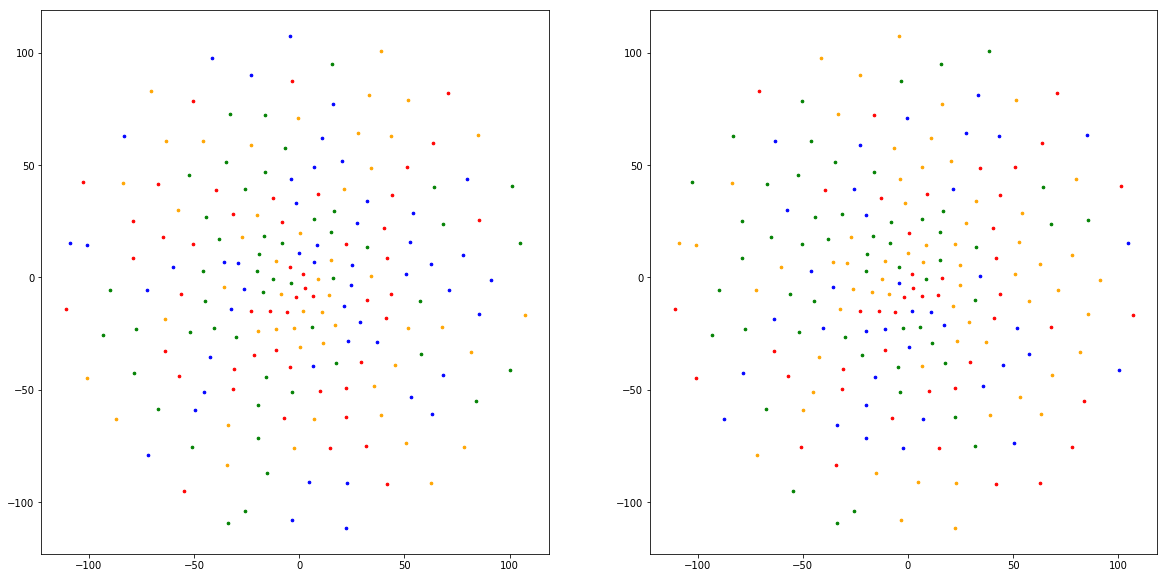

In [256]:
fig, axs = plt.subplots(1, 2,figsize = [20,10])
for i in range(200):
    axs[0].scatter(t_X[i, 0], t_X[i,1], s=7, color = colors[int(clusters[i]) - 1])
    axs[1].scatter(t_X[i, 0], t_X[i,1], s=7, color = colors[int(labels[i]) - 1])

There are some similarities between the clussters and the original labels, however because the dimention reduction is very extreme(32888 ->2) here and also because the different data are very close to each other, we are not able to see a huge similarity between the two plots.